## HELP International NGO

### Dataset: 'Country-data.csv'

### Objective: Help the NGO to select the countries that need immediate financial aid
    It is required to cluster the countries by the socio economic factors and then present
    our recommendations.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

    Summary:
    There are 167 rows and 10 columns in DataFrame.
    The 10 columns comprises of numeric value except the country name, which is the output column.
    The dataset is clean, i.e no missing/null values.

## EDA:-

### Correlation Analysis: Heatmap

<AxesSubplot:>

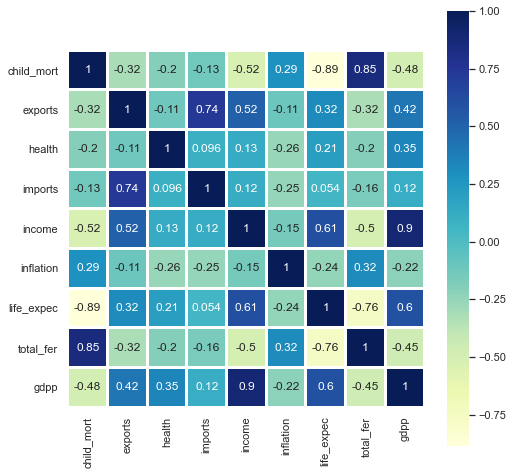

In [6]:
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, linewidths=2, square=True, cmap="YlGnBu")

### Observations:
    GDP & Income shows high positive correlation (0.9)
    Child Mortality and Total fertility rate shows high positive correlation (0.85)
    Imports and Exports show high positive correlation (0.74)
    
    Life expectancy and Child mortality rate shows high negative correlation (-0.89)
    Life expectancy and Total fertility shows high negative correlation (-0.76)

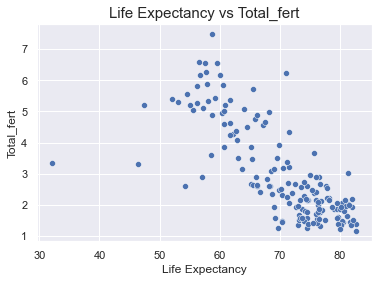

In [7]:
#Life expectancy vs Total_fert
sns.set_style('darkgrid')
x=data['life_expec']
y=data['total_fer']
sns.scatterplot(x,y)
plt.xlabel('Life Expectancy')
plt.ylabel('Total_fert')
plt.title('Life Expectancy vs Total_fert', fontsize=15)
plt.show();

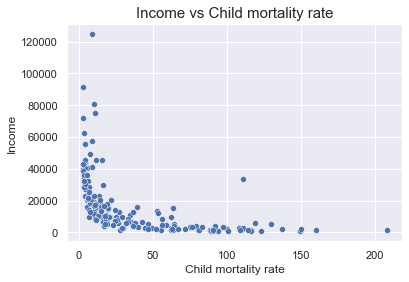

In [8]:
#Income vs Child mortality rate
sns.set_style('darkgrid')
x=data['child_mort']
y=data['income']
sns.scatterplot(x,y)
plt.xlabel('Child mortality rate')
plt.ylabel('Income')
plt.title('Income vs Child mortality rate', fontsize=15)
plt.show();

    Comments: cmr is comparatively less for high income groups

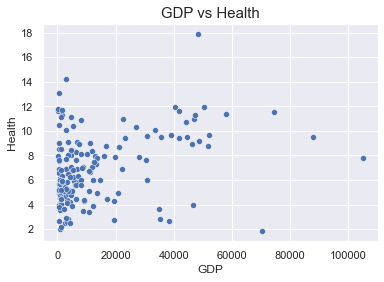

In [9]:
#GDP vs Health
sns.set_style('darkgrid')
x=data['gdpp']
y=data['health']
sns.scatterplot(x,y)
plt.xlabel('GDP')
plt.ylabel('Health')
plt.title('GDP vs Health', fontsize=15)
plt.show();

### Note: 
        Some feature columns are highly correlated and therefore not good to be used directly for model building.
        We will use PCA to overcome this multicollinearity and find the Principal Components which are not correlated.

## Principal Component Analysis:

In [10]:
df_data = data.copy(deep=True)

In [11]:
#set countries as index
df_data.set_index('country', inplace=True)
df_data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
#scaling the dataset with Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_df=scaler.fit_transform(df_data)
scaled_df=pd.DataFrame(scaled_df, columns=df_data.columns)

scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [13]:
#importing PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=40)
pca.fit(scaled_df)

PCA(random_state=40, svd_solver='randomized')

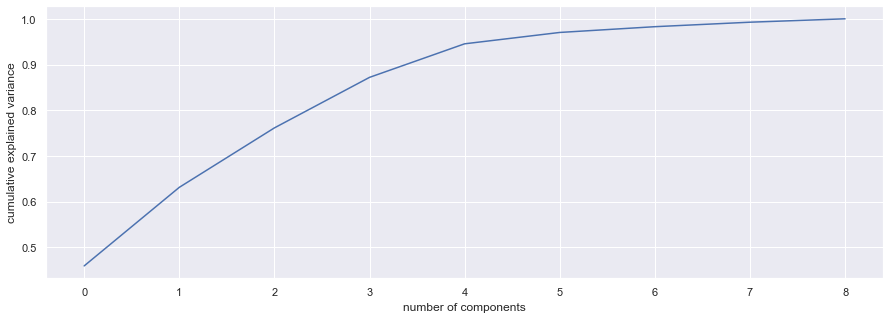

In [14]:
#Making the screeplot-plotting the cumulative variance against the number of components
plt.figure(figsize = (15,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Comments: 
    We select 4 as number of principal components since it explains 95% variance.

In [15]:
pca_4 = PCA(n_components=4,random_state=100)

In [16]:
scaled_df_pca = pd.DataFrame(pca_4.fit_transform(scaled_df))
scaled_df_pca.index = scaled_df.index
scaled_df_pca.columns = ['PC1','PC2','PC3','PC4']
scaled_df_pca.shape

(167, 4)

### Note: 
    On further analysis, it is seen that dimension reduction did not improve our clustering model efficiency.
    So we do not go for pca here.

## Hierarchical Clustering Method:

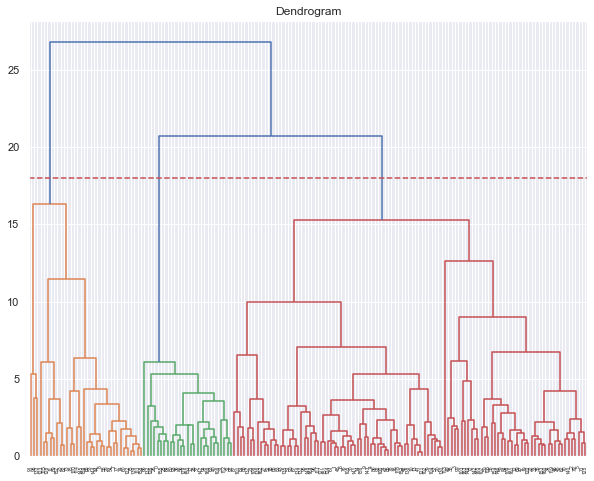

In [17]:
#Dendrogram

from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_df, method='ward')

plt.figure(figsize=(10,8))
plt.title('Dendrogram')

dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts='True')

plt.hlines(18,0,5000, colors='r', linestyle='dashed')

plt.show()

### Comments: Horizontal line cuts the dendrogram at 3 points. Therfore no. of clusters can be taken as 3.

In [18]:
#Agglomerative Clustering for 3 clusters
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels_agg=cluster.fit_predict(scaled_df)
labels_agg

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [19]:
data_agg = data.copy(deep=True)

In [20]:
data_agg['cluster'] = labels_agg

In [21]:
data_cluster = data_agg.groupby("cluster")["country"].count()
data_cluster

cluster
0     34
1    106
2     27
Name: country, dtype: int64

In [22]:
#statistical data for clustering 
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [23]:
data_agg[['country', 'cluster']].loc[data_agg['child_mort'] > 110]

,country,cluster
3,Angola,1
17,Benin,2
25,Burkina Faso,2
31,Central African Republic,2
32,Chad,2
37,"Congo, Dem. Rep.",2
40,Cote d'Ivoire,2
49,Equatorial Guinea,1
64,Guinea-Bissau,2
66,Haiti,2


In [24]:
data_agg[['country', 'cluster']].loc[data_agg['life_expec'] < 50]

,country,cluster
31,Central African Republic,2
66,Haiti,2
87,Lesotho,1


In [25]:
data_agg[['country', 'cluster']].loc[data_agg['gdpp'] < 1200]

,country,cluster
0,Afghanistan,2
12,Bangladesh,1
17,Benin,2
25,Burkina Faso,2
26,Burundi,2
27,Cambodia,1
31,Central African Republic,2
32,Chad,2
36,Comoros,2
37,"Congo, Dem. Rep.",2


In [26]:
data_agg[['country', 'cluster']].loc[data_agg['total_fer'] > 5 ]

,country,cluster
0,Afghanistan,2
3,Angola,1
17,Benin,2
25,Burkina Faso,2
26,Burundi,2
28,Cameroon,2
31,Central African Republic,2
32,Chad,2
37,"Congo, Dem. Rep.",2
40,Cote d'Ivoire,2


In [27]:
data_agg[['country', 'cluster', 'income']].loc[data_agg['cluster'] == 0]

,country,cluster,income
7,Australia,0,41400
8,Austria,0,43200
11,Bahrain,0,41100
15,Belgium,0,41100
23,Brunei,0,80600
29,Canada,0,40700
44,Denmark,0,44000
53,Finland,0,39800
54,France,0,36900
58,Germany,0,40400


In [28]:
data_agg[['country', 'cluster', 'income']].loc[data_agg['cluster'] == 1]

,country,cluster,income
1,Albania,1,9930
2,Algeria,1,12900
3,Angola,1,5900
4,Antigua and Barbuda,1,19100
5,Argentina,1,18700
...,...,...,...
161,Uzbekistan,1,4240
162,Vanuatu,1,2950
163,Venezuela,1,16500
164,Vietnam,1,4490


In [29]:
data_agg[['country', 'cluster', 'income']].loc[data_agg['cluster'] == 2]

,country,cluster,income
0,Afghanistan,2,1610
17,Benin,2,1820
25,Burkina Faso,2,1430
26,Burundi,2,764
28,Cameroon,2,2660
31,Central African Republic,2,888
32,Chad,2,1930
36,Comoros,2,1410
37,"Congo, Dem. Rep.",2,609
40,Cote d'Ivoire,2,2690


In [30]:
print("Countries of Cluster 2: ", data_agg['country'].loc[data_agg['cluster']==2].to_list())

Countries of Cluster 2:  ['Afghanistan', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', "Cote d'Ivoire", 'Gambia', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Madagascar', 'Malawi', 'Mali', 'Mozambique', 'Niger', 'Rwanda', 'Senegal', 'Sierra Leone', 'Tanzania', 'Togo', 'Uganda', 'Zambia']


## Conclusion:
    By considering the socio-economic factors like income, child mortality, life expectancy etc;
    Cluster-2 which has 27 countries are in the immediate requirement of financial aid from HELP.